## Here i am using a pre-trained model to detect hair in image and Create the mask from the predicted model.

## importing needed packages

In [ ]:
import cv2,sys,dlib,time,math
import numpy as np
import matplotlib.pyplot as plt

##now i load the image and convert it to RGB format so that it can be used by Dlib and also for displaying using matplotlib


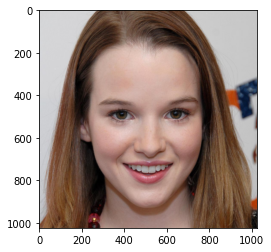

In [ ]:
lipstick = cv2.imread("/content/116.jpg")
img = cv2.cvtColor(lipstick,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
import keras

###  here i Modified code for own interest code is taken from author

In [ ]:
def predict(image, height=224, width=224):
    im = image.copy()
    im = im / 255
    im = cv2.resize(im, (height, width))
    im = im.reshape((1,) + im.shape)    
    pred = model.predict(im)
    mask = pred.copy()
    mask = mask.reshape((224, 224,1))
    row, col, _ = image.shape
    mask = cv2.resize(mask, (col, row))
    return mask

## here i load hair detection model
## model source https://github.com/thangtran480/hair-segmentation/releases

In [ ]:
model = keras.models.load_model('/content/hairnet_matting_30.hdf5')

In [ ]:
# Predict the mask from the image
hairmask = predict(img)

## here i check shape of  original and predict mask image

In [ ]:
print("Original shape")
print(img.shape)

print("predicted mask shape")
print(hairmask.shape)

Original shape
(1024, 1024, 3)
predicted mask shape
(1024, 1024)


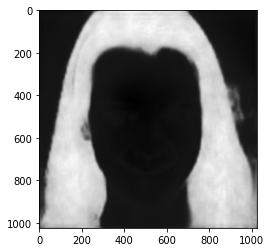

In [ ]:
plt.imshow(hairmask)

(1024, 1024)


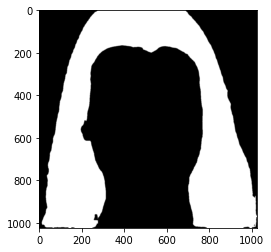

In [ ]:
# Mask Creation
threshold = 0.7
bit8_hairmask = hairmask.copy()

# Convert the float hairmask into uint8 values
bit8_hairmask[bit8_hairmask > threshold] = 255
bit8_hairmask[bit8_hairmask <= threshold] = 0

# convert unint8 mask to a boolean mask
bin_hairmask = bit8_hairmask.astype(np.bool)
print(bin_hairmask.shape)
plt.imshow(bin_hairmask)

In [ ]:
# Convert the 8bit mask into a 3 dimensional image with a hue swap
rgb_mask = bit8_hairmask.copy()

# add new dimension
rgb_mask = rgb_mask.astype(np.uint8)
rgb_mask = rgb_mask[:,:,np.newaxis]
print(rgb_mask.shape)

# repeat the dimension in the 3rd axis
rgb_mask = rgb_mask.repeat(3, axis = 2)

print(rgb_mask.shape)

(1024, 1024, 1)
(1024, 1024, 3)


In [ ]:
color=(0,0,255)

In [ ]:
# break the color into its numerical components
r, g, b = color

# Set the r g b channels to their set
rgb_mask[:,:,0][bin_hairmask] = r
rgb_mask[:,:,1][bin_hairmask] = g
rgb_mask[:,:,2][bin_hairmask] = b

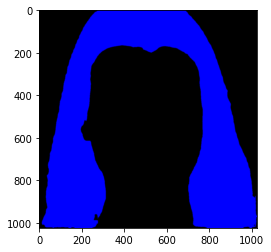

In [ ]:
plt.imshow(rgb_mask)

In [ ]:
# RGB to HLS Conversion
hls_mask = cv2.cvtColor(rgb_mask, cv2.COLOR_RGB2HLS)
hls_img = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
channel = 0

h_mask, h_img = hls_mask[:,:, channel], hls_img[:,:, channel]

h_img[bin_hairmask] = h_mask[bin_hairmask]

hair_change_img = cv2.cvtColor(hls_img, cv2.COLOR_HLS2RGB)

## final output

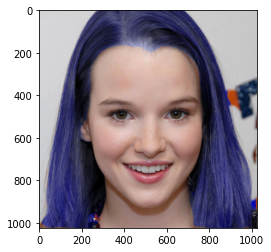

In [ ]:
plt.imshow(hair_change_img)

#reference
https://github.com/thangtran480/hair-segmentation